# Time Series

As an example of time series  we will be looking at weather data which is easily obtained.
The data set we will look at is from the 
Global Historical Climatology Network (GHCN): 2005-2015 New York Region

The data comes from http://www.ncdc.noaa.gov/cdo-web/datasets 

Air Temperature: (tenths of degrees Celsius)
* MNTM - Monthly mean temperature
* MMNT - Monthly Mean minimum temperature
* MMXT - Monthly Mean maximum temperature
* EMNT - Extreme minimum daily temperature
* EMXT - Extreme maximum daily temperature
    
Precipitation: (tenths of mm)
* TPCP - Total precipitation
* EMXP - Extreme maximum daily precipitation 
    
Snow: (mm)
* TSNW - Total snow fall
* MXSD - Maximum snow depth
    
Note that one of the great strengths of Pandas is time series. Pandas is particularly helpful.
If your version is not 

In [1]:
import pandas as pd
pd.__version__

'0.23.4'

In [2]:
ghcn = pd.read_csv('https://raw.githubusercontent.com/story645/ams_tutorials/master/data/nyc_2005_2015.csv')

In [3]:
ghcn.head()

In [4]:
ghcn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 11 columns):
STATION_NAME    1625 non-null object
DATE            1625 non-null int64
EMXP            1625 non-null int64
MXSD            1625 non-null int64
TPCP            1625 non-null int64
TSNW            1625 non-null int64
EMXT            1625 non-null int64
EMNT            1625 non-null int64
MMXT            1625 non-null int64
MMNT            1625 non-null int64
MNTM            1625 non-null int64
dtypes: int64(10), object(1)
memory usage: 139.7+ KB


In [5]:
ghcn.columns

Index(['STATION_NAME', 'DATE', 'EMXP', 'MXSD', 'TPCP', 'TSNW', 'EMXT', 'EMNT',
       'MMXT', 'MMNT', 'MNTM'],
      dtype='object')

In [6]:
ghcn[['MMNT','TSNW']][5:15:2]

In [7]:
ghcn.loc[5:15:2,'TSNW':'MNTM']

In [8]:
ghcn.iloc[5:15:2,5:10]

In [9]:
ghcn['MMNT'].min(),ghcn['MMNT'].max(),ghcn['MMNT'].mean()

(-9999, 239, -2825.9304615384617)

In [10]:
import numpy as np
np.__version__

'1.15.3'

In [11]:
ghcn.replace(-9999,np.nan,inplace=True)

In [12]:
ghcn.describe()

In [13]:
ghcn['TPCP'].describe()

count    1622.000000
mean      977.469174
std       665.199628
min         0.000000
25%       553.000000
50%       880.500000
75%      1250.000000
max      4813.000000
Name: TPCP, dtype: float64

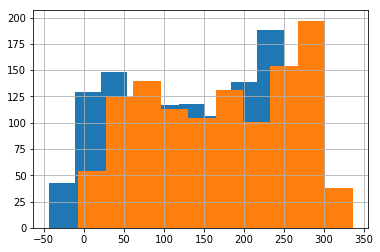

In [14]:
%matplotlib inline
ghcn['MNTM'].hist()
ghcn['MMXT'].hist()

In [15]:
import matplotlib.pyplot as plt


In [16]:
%magic help

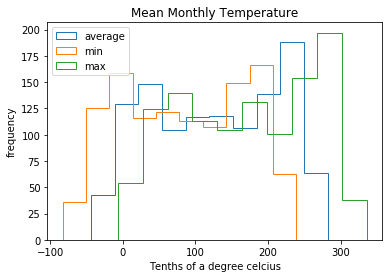

In [17]:
fig, ax = plt.subplots()
_ = ghcn['MNTM'].hist(histtype='step', ax=ax, label='average')
_ = ghcn['MMNT'].hist(histtype='step', ax=ax, label='min')
_ = ghcn['MMXT'].hist(histtype='step', ax=ax, label='max')
_ = ax.legend(loc='upper left')
_ = ax.set_title("Mean Monthly Temperature")
_ = ax.set_xlabel('Tenths of a degree celcius')
ax.set_ylabel('frequency')
ax.grid(False)

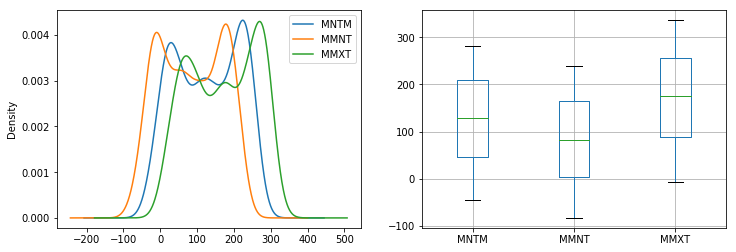

In [18]:
fig, (ax1, ax2) = plt.subplots(figsize=(12,4), ncols=2)
_ = ghcn[['MNTM','MMNT','MMXT']].plot.kde(ax=ax1)
_ = ghcn[['MNTM','MMNT','MMXT']].boxplot(ax=ax2)


In [19]:
ghcn.describe()

In [20]:
import seaborn as sns

ghcn['STATION_NAME'].value_counts()

FARMINGDALE REPUBLIC AIRPORT NY US                  121
NEW YORK LAGUARDIA AIRPORT NY US                    121
WESTCHESTER CO AIRPORT NY US                        121
NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US    121
NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US     121
CENTERPORT NY US                                    121
BRONX NY US                                         101
WANTAGH CEDAR CREEK NY US                            83
MINEOLA NY US                                        83
DOBBS FERRY ARDSLEY NY US                            83
FLORAL PARK 0.4 W NY US                              81
STATEN ISLAND 4.5 SSE NY US                          60
OCEANSIDE NY US                                      57
LEVITTOWN 0.2 E NY US                                54
STATEN ISLAND 1.4 SE NY US                           41
MIDDLE VILLAGE 0.5 SW NY US                          39
NEW ROCHELLE 1.3 S NY US                             35
WEST NYACK 1.3 WSW NY US                        

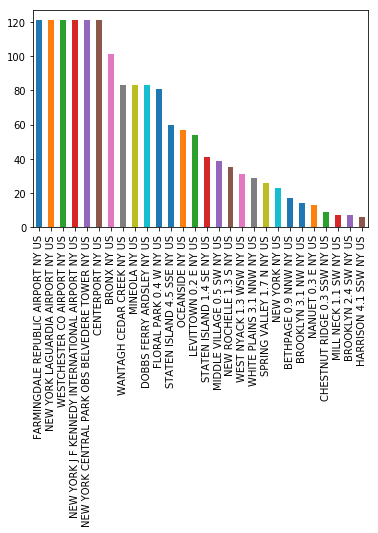

In [21]:
ghcn['STATION_NAME'].value_counts().plot.bar()

In [22]:
ghcn[ghcn['STATION_NAME'].str.contains('HARRISON')]

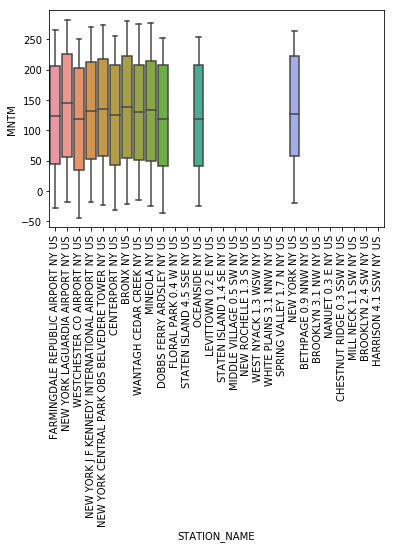

In [23]:
g=sns.boxplot(y='MNTM', x='STATION_NAME', data=ghcn, 
             order=ghcn['STATION_NAME'].value_counts().keys())
_ = g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [24]:
ghcn['DATE'].head()

0    20050601
1    20050701
2    20050801
3    20050901
4    20051001
Name: DATE, dtype: int64

In [25]:
ghcn['date']=pd.to_datetime(ghcn['DATE'],format='%Y%m%d')

In [26]:
ghcn['date'].head()

0   2005-06-01
1   2005-07-01
2   2005-08-01
3   2005-09-01
4   2005-10-01
Name: date, dtype: datetime64[ns]

In [27]:
stations = dict(list(ghcn.groupby('STATION_NAME')))
stations.keys()

dict_keys(['BETHPAGE 0.9 NNW NY US', 'BRONX NY US', 'BROOKLYN 2.4 SW NY US', 'BROOKLYN 3.1 NW NY US', 'CENTERPORT NY US', 'CHESTNUT RIDGE 0.3 SSW NY US', 'DOBBS FERRY ARDSLEY NY US', 'FARMINGDALE REPUBLIC AIRPORT NY US', 'FLORAL PARK 0.4 W NY US', 'HARRISON 4.1 SSW NY US', 'LEVITTOWN 0.2 E NY US', 'MIDDLE VILLAGE 0.5 SW NY US', 'MILL NECK 1.1 SW NY US', 'MINEOLA NY US', 'NANUET 0.3 E NY US', 'NEW ROCHELLE 1.3 S NY US', 'NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US', 'NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US', 'NEW YORK LAGUARDIA AIRPORT NY US', 'NEW YORK NY US', 'OCEANSIDE NY US', 'SPRING VALLEY 1.7 N NY US', 'STATEN ISLAND 1.4 SE NY US', 'STATEN ISLAND 4.5 SSE NY US', 'WANTAGH CEDAR CREEK NY US', 'WEST NYACK 1.3 WSW NY US', 'WESTCHESTER CO AIRPORT NY US', 'WHITE PLAINS 3.1 NNW NY US'])

In [28]:
cpd = stations['NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US']

In [29]:
cpd.head()

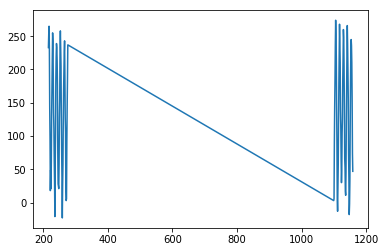

In [30]:
cpd['MNTM'].plot()

In [31]:
cpd = cpd[['MNTM','date']].set_index('date')

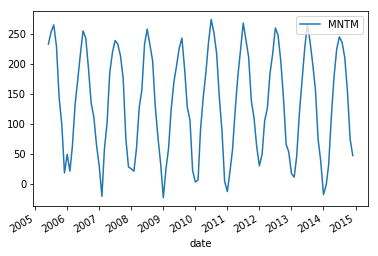

In [32]:
_=cpd.plot()

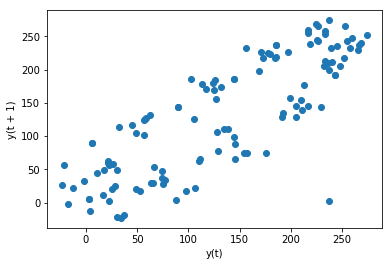

In [33]:
_= pd.plotting.lag_plot(cpd['MNTM'],lag=1)

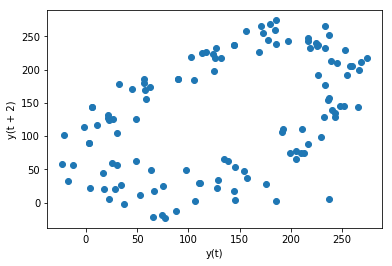

In [34]:
_= pd.plotting.lag_plot(cpd['MNTM'],lag=2)

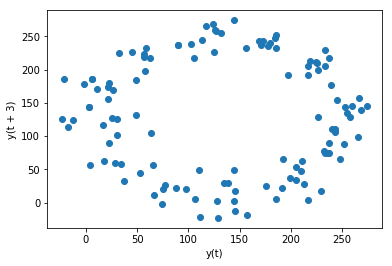

In [35]:
_= pd.plotting.lag_plot(cpd['MNTM'],lag=3)

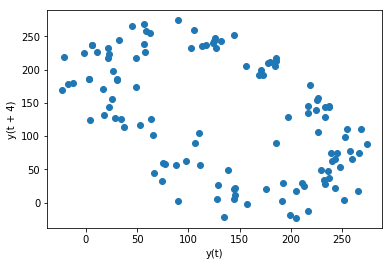

In [36]:
_= pd.plotting.lag_plot(cpd['MNTM'],lag=4)

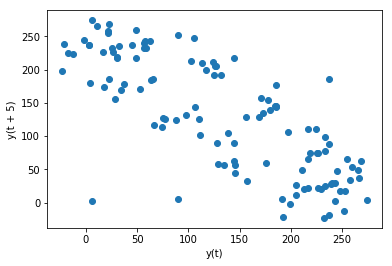

In [37]:
_= pd.plotting.lag_plot(cpd['MNTM'],lag=5)

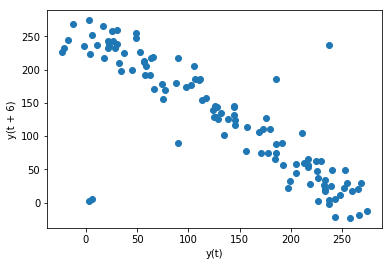

In [38]:
_= pd.plotting.lag_plot(cpd['MNTM'],lag=6)

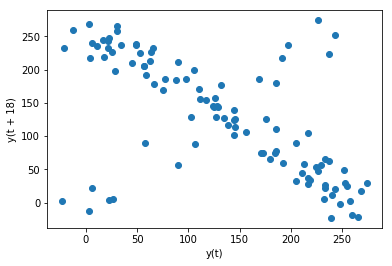

In [39]:
_= pd.plotting.lag_plot(cpd['MNTM'],lag=18)